In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False


df = pd.read_csv('D:/datasets/mldata/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 查看数据的缺失情况，并用中位数填充Age与Fare字段的缺失值；用“Unknown"填充Cabin字段的缺失值；用众数填充Embarked字段的缺失值。‪‬‪‬‪‬‪‬‪‬‮‬‪‬‮‬‪‬‪‬‪‬‪‬‪‬‮‬‭‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‭‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‮‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‮‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬

In [3]:
nul = df.isnull().sum() ##查看数据缺失情况
nul[nul > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())  #用中位数填充Age与Fare字段的缺失值
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  #用众数填充Embarked字段的缺失值
df['Cabin'] = df['Cabin'].fillna("Unknown")  #用“Unknown"填充Cabin字段的缺失值
nul = df.isnull().sum() ##查看填充后数据的缺失情况
nul[nul > 0]

Series([], dtype: int64)

2. 将Age字段按照等宽间距划分为5等分，并统计输出每个区间的人数。

In [5]:
k = 5
data = df['Age']
d1 = pd.cut(data,k)  #利用cut函数将Age字段按照等宽间距划分为5等分

d1
#qcut按照等频方式分箱，且要求分位点处的取值唯一。当有多个元素有相同的分位点处取值时，就会报错

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [5]:
idx1 = (df['Age'] >= 16.336) & (df['Age'] <= 32.252)
df1 = df[idx1]['Age']
df1.shape

(523,)

In [6]:
print(df[df['Age'] < 16.336]['Survived'].sum()/df[df['Age'] < 16.336].shape[0])
(df[df['Age'] < 32.252]['Survived'].sum() - df[df['Age'] < 16.336]['Survived'].sum())/523
# b = df[df['Age'] >=48.168]
# print(a['Survived'].sum())
# b['Survived'].sum()

0.55


0.3441682600382409

In [71]:
(df[df['Age'] < 48.168]['Survived'].sum() - df[df['Age'] < 32.252]['Survived'].sum())/188

0.40425531914893614

In [74]:
(df[df['Age'] < 64.084]['Survived'].sum() - df[df['Age'] < 48.168]['Survived'].sum())/69

0.43478260869565216

In [160]:
idx = d1.value_counts().index  #查看每个区间的人数
idx.categories[1].left

# (16.336, 32.252]    408
# (32.252, 48.168]    146
# (0.34, 16.336]       73
# (48.168, 64.084]     51
# (64.084, 80.0]        8

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

3. 将SibSP与Parch两个字段的数值相加，生成新的字段”Family"，表示与乘客同船的家庭成员人数。

In [5]:
df['Family'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0


4. 将字段Pclass及Sex字段转化为哑变量的形式。其中，Age字段中，请用数字0代表male，用数字1代表female.‪‬‪‬‪‬‪‬‪‬‮‬‪‬‮‬‪‬‪‬‪‬‪‬‪‬‮‬‭‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‭‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‪‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‮‬‪‬‪‬‪‬‪‬‪‬‮‬‫‬‮‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬‬

In [6]:
print(len(df['Sex']))
for i in range(len(df['Sex'])):
    df.iloc[i,4] = 0 if(df.iloc[i,4] == 'male') else 1  #利用iloc修改性别 
df.head()
#注意：这里用df['Sex'][i]同样可以赋值，但是会有warning，如下图

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0


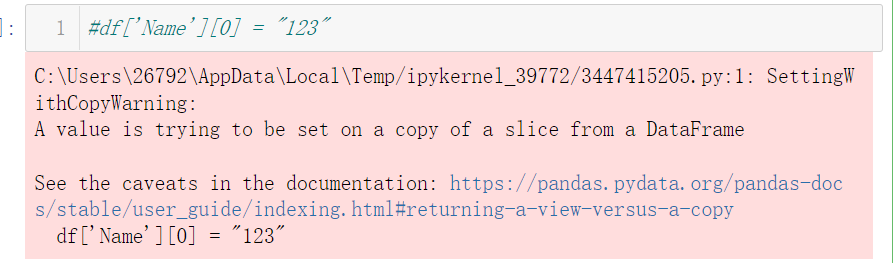

5. 提取乘客姓名Name中的头衔(如Mr.，Miss.，Mrs.等），按照下表所示的对应关系将乘客头衔归为6个类别，生成新字段“Title"，并将该字段转化为哑变量的形式。

In [7]:
df['Title'] = df['Name'].str.split(' ') #将name值按空格分开，分开后类型为列表 如[Braund,, Mr., Owen, Harris]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,"[Braund,, Mr., Owen, Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,"[Cumings,, Mrs., John, Bradley, (Florence, Bri..."
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,"[Heikkinen,, Miss., Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,"[Futrelle,, Mrs., Jacques, Heath, (Lily, May, ..."
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,"[Allen,, Mr., William, Henry]"


In [8]:
lst = ['Capt.','Col.','Major.','Dr.','Rev.','Jonkheer.'
       ,'Don.','Sir.','Countess.','Dona.','Lady.',
      'Master.','Miss.','Mlle.','Mr.','Mrs.','Ms.','Mme.'
      ] #将关键字放到列表中

In [9]:
for i in range(len(df['Title'])):
    pos = 0
    for j in range(len(df['Title'][i])):
        if(df['Title'][i][pos] not in lst): #如果不是关键字，就删掉
            df['Title'][i].pop(pos)
        else:
            pos+=1
df['Title'].head()
# Braund,, Mr., Owen, Harris
# 0 0
# 1
# 2
# 2 2

0      [Mr.]
1     [Mrs.]
2    [Miss.]
3     [Mrs.]
4      [Mr.]
Name: Title, dtype: object

In [10]:
df['Title'].value_counts() #查看头衔的分布

[Mr.]          517
[Miss.]        182
[Mrs.]         125
[Master.]       40
[Dr.]            7
[Rev.]           6
[Mlle.]          2
[Major.]         2
[Col.]           2
[Countess.]      1
[Capt.]          1
[Ms.]            1
[Sir.]           1
[Lady.]          1
[Mme.]           1
[Don.]           1
[Jonkheer.]      1
Name: Title, dtype: int64

In [11]:
dd = df['Title'].apply(pd.Series).stack() #stack方法可以吧列表转换成字符串
print(dd.head())
df['Title'] = dd.values 
df.head()

0  0      Mr.
1  0     Mrs.
2  0    Miss.
3  0     Mrs.
4  0      Mr.
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,Mr.


In [18]:
# i = 0
# for x in df['Title']:
#     if(x in lst[0:5]):
#         df.iloc[i,13] = "Officer_" + x.replace(".","")
#     if(x in lst[5:11]):
#         df.iloc[i,13] = "Royalty_" + x.replace(".","")
#     if(x == "Master."):
#         df.iloc[i,13] = "Master"
#     if(x in lst[12:14]):
#         df.iloc[i,13] = "Miss_" + x.replace(".","")
#     if(x == "Mr."):
#         df.iloc[i,13] = "Mr"
#     if(x in lst[-3:]):
#         df.iloc[i,13] = "Mrs_" + x.replace(".","")
#     i += 1
# #     if(i < 5):
# #         print(x,df['Name'][i-1])
# #print(df['Name'].head())
# df.head()        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs_Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Miss_Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs_Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,Mr


In [12]:
di = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].apply(lambda x:di[x]) #将Embarked数值化
i = 0
for x in df['Title']:  #将Title数值化
    if(x in lst[0:5]):
        df.iloc[i,13] = 0
    if(x in lst[5:11]):
        df.iloc[i,13] = 1
    if(x == "Master."):
        df.iloc[i,13] = 2
    if(x in lst[12:14]):
        df.iloc[i,13] = 3
    if(x == "Mr."):
        df.iloc[i,13] = 4
    if(x in lst[-3:]):
        df.iloc[i,13] = 5
    i += 1
#     if(i < 5):
#         print(x,df['Name'][i-1])
#print(df['Name'].head())
df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,0,4


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Family           int64
Title           object
dtype: object

In [13]:
df[['Sex','Title']] = df[['Sex','Title']].astype(float)

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Family           int64
Title          float64
dtype: object

In [14]:
df.corr()['Survived'].sort_values(ascending =False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Title         -0.042879
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

7. （开放题）选取合适的字段以及合适的模型训练一个乘客生存预测模型，并在测试集上输出模型的准确率。

In [22]:
X = df[['Age','Sex','Pclass']]
#X = X.sort_values('Age')
y = df['Survived']

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.21, random_state=524)

# print(X.shape,y.shape)
# print(X_train.shape,X_test.shape)

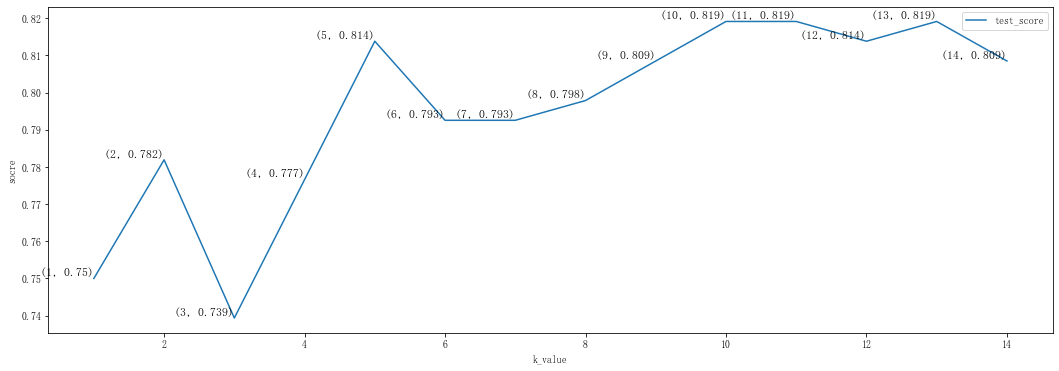

In [147]:
from sklearn.neighbors import KNeighborsClassifier

test_score_list = []
for k in range(1, 15):
    # 实例化
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'chebyshev')
    # 采用训练集进行训练
    knn.fit(X_train, y_train)
    # 评估模型
    # 评估在测试集上的表现情况
    test_score_list.append(knn.score(X_test, y_test))

# 4. 绘制成折线图
plt.figure(figsize = (18,6))
plt.plot(range(1, 15), test_score_list, label='test_score');
plt.xlabel('k_value')
plt.ylabel('socre')
for a, b in zip(range(1, 15), test_score_list):  
    plt.text(a, b, (a,round(b,3)),ha='right', va='bottom', fontsize=12) #ha:水平对齐方式  va：垂直对齐方式
plt.legend();


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.21, random_state=524)

from sklearn.neighbors import KNeighborsClassifier

my_knn_clf = KNeighborsClassifier(n_neighbors=9)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)
print("使用欧拉距离的准确率：{}".format(my_knn_clf.score(X_test, y_test)))


使用欧拉距离的准确率：0.8670212765957447


In [146]:
from sklearn.neighbors import KNeighborsClassifier

my_knn_clf = KNeighborsClassifier(n_neighbors=9,metric = 'manhattan')
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)
print("使用曼哈顿距离的准确率：{}".format(my_knn_clf.score(X_test, y_test)))


使用曼哈顿距离的准确率：0.8617021276595744


In [149]:
from sklearn.neighbors import KNeighborsClassifier

my_knn_clf = KNeighborsClassifier(n_neighbors=10,metric = 'chebyshev')
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)
print("使用切比雪夫距离的准确率：{}".format(my_knn_clf.score(X_test, y_test)))

使用切比雪夫距离的准确率：0.8191489361702128


In [148]:
from sklearn.neighbors import KNeighborsClassifier

my_knn_clf = KNeighborsClassifier(n_neighbors=9,metric = 'minkowski')
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)
print("使用闵可夫斯基距离的准确率：{}".format(my_knn_clf.score(X_test, y_test)))


使用闵可夫斯基距离的准确率：0.8670212765957447


In [15]:
X = df[['Age','Sex','Pclass','Fare','Embarked']]
print(X.head())

    Age  Sex  Pclass     Fare  Embarked
0  22.0  0.0       3   7.2500         0
1  38.0  1.0       1  71.2833         1
2  26.0  1.0       3   7.9250         0
3  35.0  1.0       1  53.1000         0
4  35.0  0.0       3   8.0500         0


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

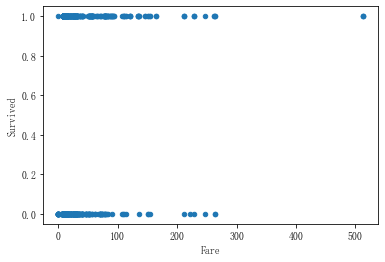

In [23]:
test_1 = df[['Fare','Survived']]
test_1.plot('Fare','Survived',kind = 'scatter')

## SVM预测

In [16]:
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['Age','Sex','Pclass','Fare','Embarked']]
#X = X.sort_values('Age')
y = df['Survived']
ma = 0
ma_idx = 0
auc = []
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
for i in range(0,800): #将random_state从1遍历到800，找最大的准确率
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.23, random_state=i)
    model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("log_reg", svm.SVC(kernel='poly') )
     ])
    model.fit(X_train, y_train)
    cv_score = model.score(X_test, y_test)
    auc.append(cv_score)
   # print(cv_score,ma)
    if(cv_score > ma):
        ma = cv_score
        ma_idx = i
print(ma_idx)
print(ma)
print()
# print(model.predict(X_test)[-10:])
# print(y_test[-10:])

503
0.9219512195121952



0.9219512195121952


Text(0, 0.5, 'socre')

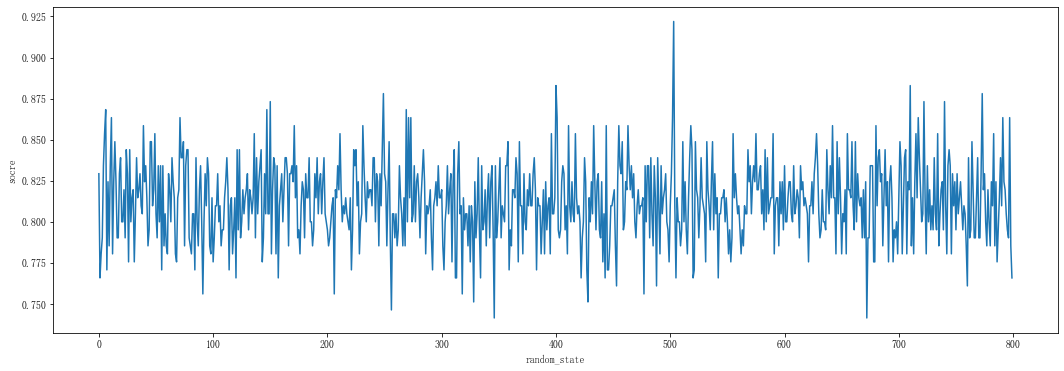

In [16]:
# print(len(auc))
print(auc[503])
plt.figure(figsize = (18,6))
plt.plot(range(0, 800), auc, label='score');
plt.xlabel('random_state')
plt.ylabel('socre')

In [21]:
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['Age','Sex','Pclass','Fare','Embarked']]
#X = X.sort_values('Age')
y = df['Survived']
ma = 0
ma_idx = 0


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.23, random_state=503)

model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("svm", svm.SVC(C = 1,kernel='poly',degree=3) )
])
model.fit(X_train, y_train)
cv_score = model.score(X_test, y_test)

print(cv_score)
# print(X_test.shape)
# print(model.predict(X_test)[-20:-10])
# print(y_test[-20:-10])

0.9219512195121952


In [184]:
print('---原始数据集年龄分布：---')
k=5
X_age = X['Age']
X_age = pd.cut(X_age,k)  #利用cut函数将Age字段按照等宽间距划分为5等分

print(X_age.value_counts())
print('---训练集年龄分布：---')
trainage = X_train['Age']
trainage = pd.cut(trainage,k)  #利用cut函数将Age字段按照等宽间距划分为5等分

print(trainage.value_counts())

print('---原始数据集票价分布：---')
k = 4
X_fare = X['Fare']
X_fare = pd.cut(X_fare,k)  #利用cut函数将Age字段按照等宽间距划分为5等分

print(X_fare.value_counts())

trainfare = X_train['Fare']
trainfare = pd.cut(trainfare,k)  #利用cut函数将Age字段按照等宽间距划分为5等分
print('---训练集票价分布：---')
print(trainfare.value_counts())

---原始数据集年龄分布：---
(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64
---训练集年龄分布：---
(16.336, 32.252]    409
(32.252, 48.168]    136
(0.34, 16.336]       79
(48.168, 64.084]     54
(64.084, 80.0]        8
Name: Age, dtype: int64
---原始数据集票价分布：---
(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64
---训练集票价分布：---
(-0.512, 128.082]     655
(128.082, 256.165]     23
(256.165, 384.247]      5
(384.247, 512.329]      3
Name: Fare, dtype: int64


[ 0.64734223 -1.04270262  1.24922071  1.42564631  0.88424332 -1.04750885
  0.99028205 -1.03356465 -1.01507833 -1.08437331 -1.00879906  0.9995786
  1.15334516  0.94862416 -1.00001126 -1.00063228  0.24781291  0.99010421
 -0.45811228 -1.07957046 -1.01842031 -0.98837845  0.99224699  1.00026876
 -1.18904987 -0.36561647 -0.95884482 -1.04682564 -1.03213834 -0.93364692
 -1.02710115 -1.0177561  -1.0177561   0.99909171 -1.02914519  1.27854057
 -0.13500266 -0.0375144  -0.97279412 -0.86326711 -1.04677864 -1.04385167
 -1.04353871 -1.01482976  0.99992176  1.01731699 -1.07147906 -1.00282175
  0.77536338  0.97191572  1.08658422  1.04645474 -0.91963965 -1.00185167
  0.12626447 -0.99991488  1.20093613 -0.40590954  1.01925441 -0.88666118
 -1.00063228 -0.13782997  0.40250639 -1.03308105  0.86024753 -0.99705472
  0.1241002  -1.05190123  0.99012854  1.1599886  -1.00062287 -1.07067478
 -1.01542781 -0.97148122  0.99037839 -1.07773345 -1.08441581  1.62081651
 -0.99561796  1.02721102  1.11499758  0.74094077 -1.

<Figure size 432x288 with 0 Axes>

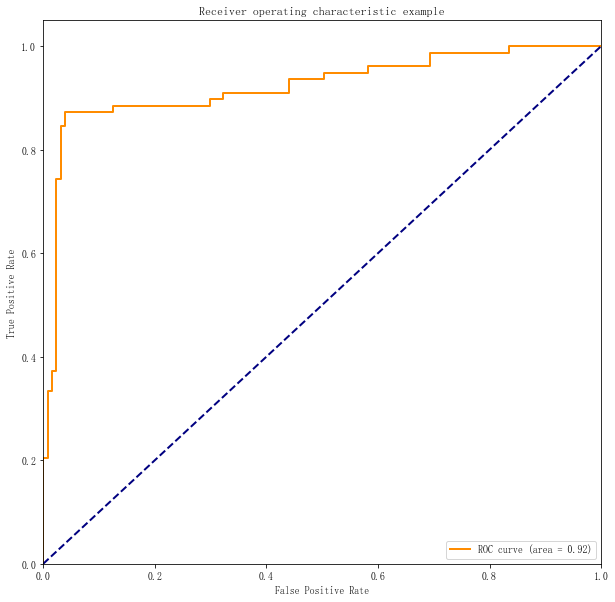

In [27]:
from sklearn.metrics import roc_curve, auc

y_score = model.decision_function(X_test)
print(y_score)
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
print(fpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


使用逻辑回归模型训练

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['Age','Sex','Pclass','Fare','Embarked']]
#X = X.sort_values('Age')
y = df['Survived']
ma = 0
ma_idx = 0
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
for i in range(1,800):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.23, random_state=i)
    model = Pipeline([
    ("poly", PolynomialFeatures()),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])
    model.fit(X_train, y_train)
    cv_score = model.score(X_test, y_test)
   # print(cv_score,ma)
    if(cv_score > ma):
        ma = cv_score
        ma_idx = i
print(ma_idx)
print(ma)

# print(model.predict(X_test)[-10:])
# print(y_test[-10:])

503
0.9024390243902439


In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X = df[['Age','Sex','Pclass','Fare','Embarked']]
#X = X.sort_values('Age')
y = df['Survived']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.23, random_state=503)

model = Pipeline([
    
    ("poly", PolynomialFeatures()),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])
# print(X_train.values)
model.fit(X_train.values, y_train.values)

cv_score = model.score(X_test.values, y_test.values)

print(cv_score)


0.9024390243902439


In [28]:
import numpy as np
# 因为逻辑回归是分类问题，因此需要对评价指标进行更改
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, n_iter=500, eta=0.01, tol=None):
        # 训练迭代次数
        self.n_iter = n_iter
        # 学习率
        self.eta = eta
        # 误差变化阈值
        self.tol = tol
        # 模型参数w(训练时初始化)
        self.w = None

    def _z(self, X, w):
        '''g(x)函数: 计算x与w的内积.'''
        return np.dot(X, w) 

    def _sigmoid(self, z):
        '''Logistic函数'''
        return 1/(1+np.exp(-z))
    
    def _predict_proba(self, X, w):
        '''h(x)函数: 预测y为1的概率.'''
        z = self._z(X, w)
        return self._sigmoid(z)

    def _loss(self, y, y_proba):
        '''计算损失'''
        m = y.size
        p = y_proba * (2 * y - 1) + (1 - y)
        return -np.sum(np.log(p)) / m

    def _gradient(self, X, y, y_proba):
        '''计算梯度'''
        return np.matmul(y_proba - y, X) / y.size

    def _gradient_descent(self, w, X, y):
        '''梯度下降算法'''

        # 若用户指定tol, 则启用早期停止法.
        if self.tol is not None:
            loss_old = np.inf

        self.loss_list = []

        # 使用梯度下降至多迭代n_iter次, 更新w.
        for step_i in range(self.n_iter):
            # 预测所有点为1的概率
            y_proba = self._predict_proba(X, w)
            # 计算损失
            loss = self._loss(y, y_proba)
            self.loss_list.append(loss)
            #print('%4i Loss: %s' % (step_i, loss))

            # 早期停止法
            if self.tol is not None:
                # 如果损失下降不足阈值, 则终止迭代.
                if loss_old - loss < self.tol:
                    break
                loss_old = loss

            # 计算梯度
            grad = self._gradient(X, y, y_proba)
            # 更新参数w
            w -= self.eta * grad

    def _preprocess_data_X(self, X):
        '''数据预处理'''

        # 扩展X, 添加x0列并置1.
        m, n = X.shape
        X_ = np.empty((m, n + 1))
        X_[:, 0] = 1
        X_[:, 1:] = X

        return X_

    def train(self, X_train, y_train):
        '''训练'''

        # 预处理X_train(添加x0=1)
        X_train = self._preprocess_data_X(X_train)  

        # 初始化参数向量w
        _, n = X_train.shape
        self.w = np.random.random(n) * 0.02

        # 执行梯度下降训练w
        self._gradient_descent(self.w, X_train, y_train)

    def predict(self, X):
        '''预测'''

        # 预处理X_test(添加x0=1)
        X = self._preprocess_data_X(X)  

        # 预测y=1的概率
        y_pred = self._predict_proba(X, self.w)

        # 根据概率预测类别
        return np.where(y_pred >= 0.5, 1, 0)
    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

log_reg = LogisticRegression(n_iter =3000)
log_reg.train(X_train, y_train)
# 查看训练数据集分类准确度
log_reg.score(X_test, y_test)

0.7365853658536585

In [218]:
import torch
n = torch.ones(10,2)
x0 = torch.normal(2*n,1)
print(x0)
y0 = torch.zeros(10)
y0

tensor([[2.8919, 2.1352],
        [1.4778, 2.8767],
        [1.7552, 0.4957],
        [0.8284, 2.7178],
        [2.2340, 2.1451],
        [0.2222, 2.1343],
        [1.3883, 0.4770],
        [1.6879, 1.6423],
        [2.0947, 2.5644],
        [2.9176, 2.4537]])


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

使用CNN预测

In [208]:
#设定网络参数
n_hidden_1 = 3 #隐藏层1的神经元个数
n_hidden_2 = 3 #隐藏层2的神经元个数
n_input = 5 #输入层的个数
n_classes = 1 #输出层的个数（我们只预测房价，就1个值所以输出是1）
training_epochs = 200 #训练次数，总体数据需要循环多少次
batch_size = 32  #每批次要取的数据的量，这里是提取10条数据

In [209]:
from keras.models import Sequential #顺序模型
from keras.layers import Dense

model = Sequential()#先建立一个顺序模型
#向顺序模型里加入第一个隐藏层，第一层一定要有一个输入数据的大小，需要有input_shape参数
#model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_1, activation='sigmoid', input_dim=n_input)) #这个input_dim和input_shape一样，就是少了括号和逗号
model.add(Dense(n_hidden_2, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid')) #因为我们是预测房价，不是分类，所以最后一层可以不用激活函数

In [210]:
from sklearn.preprocessing import MinMaxScaler #归一化

scaler = MinMaxScaler(feature_range=[0,1])
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from keras import backend as K #转换为张量
X_train = K.cast_to_floatx(X_train)
y_train = K.cast_to_floatx(y_train)
X_test = K.cast_to_floatx(X_test)
y_test = K.cast_to_floatx(y_test)
model.compile(loss='mse', optimizer='rmsprop')
#因为我们这是预测房价，一个线性回归预测，所以loss跟分类是不一样的。
#我们这里要用mean_squared_error 可简写成mse optimizer
#我这里用rmsprop大家可以用adam其它梯度下降优化函数，
#正确率我们这里用mae平均绝对误差和我们自定义的r2

#训练神经网络
# history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs,  validation_data=(test_x, test_y))
#history = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs, validation_split=0.3)
history = model.fit(X_train,y_train, batch_size=batch_size, epochs=training_epochs,validation_data=(X_test, y_test))

pred_test_y = model.predict(X_test)
print(pred_test_y[0:10])

Epoch 1/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2335 - val_loss: 0.2544
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2328 - val_loss: 0.2529
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2323 - val_loss: 0.2518
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2318 - val_loss: 0.2507
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2315 - val_loss: 0.2501
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2312 - val_loss: 0.2493
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2309 - val_loss: 0.2488
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2306 - val_loss: 0.2484
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2304 - val_loss: 0.2479
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.2477
Epoch 11/

22/22 [==============================] - 0s 1ms/step - loss: 0.1713 - val_loss: 0.1905
Epoch 83/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1703 - val_loss: 0.1897
Epoch 84/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1694 - val_loss: 0.1890
Epoch 85/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1684 - val_loss: 0.1882
Epoch 86/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1675 - val_loss: 0.1875
Epoch 87/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1666 - val_loss: 0.1865
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1656 - val_loss: 0.1858
Epoch 89/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1647 - val_loss: 0.1850
Epoch 90/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1637 - val_loss: 0.1842
Epoch 91/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1629 - val_loss: 0.1835
Epoch 92/200


In [211]:
print(pred_test_y[-10:])
print(y_test[-10:])

[[0.15792009]
 [0.62464213]
 [0.16474235]
 [0.85244226]
 [0.10672832]
 [0.77919084]
 [0.10683963]
 [0.11262685]
 [0.12292323]
 [0.10668778]]
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]


In [27]:
print(pred_test_y[10:20])
print(y_test[10:20])

[[0.18904847]
 [0.6781111 ]
 [0.12980045]
 [1.0104225 ]
 [0.34792972]
 [0.1463245 ]
 [0.538357  ]
 [0.12153845]
 [0.05910431]
 [0.3338948 ]]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]


In [28]:
my_knn_clf.score(X_test, y_test)

0.8044692737430168